# Project Statement: Rock Vs. Mine Prediction
The project of rock vs. mine prediction is essentially a binary classification problem. Given geological data about a specific location, the task is to predict whether it is likely to contain valuable minerals (a mine) or not (just rock).

# Create environment and read Data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = r"sonar data.csv"   # here no header present
df = pd.read_csv(path, header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# Data Preprocesing

In [3]:
df.shape

(208, 61)

In [4]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
# df.info()

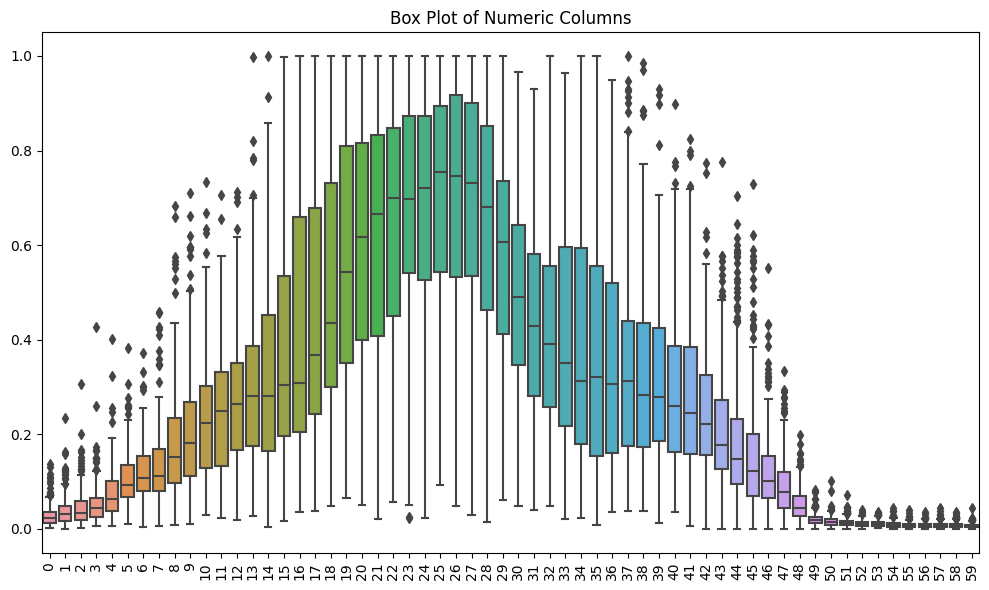

In [7]:
# Select the numeric columns
numeric_data = df.iloc[:, :-1]

# Create a box plot for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_data)
plt.title("Box Plot of Numeric Columns")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [8]:
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


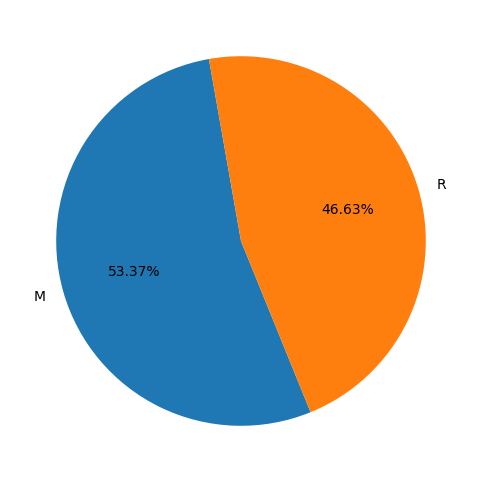

In [9]:
value_counts = df[60].value_counts()
value_counts

plt.figure(figsize=(10,6))
plt.pie(value_counts, labels =value_counts.index,  autopct= '%1.2f%%',startangle =100)
plt.show()

In [10]:
from scipy import stats

for column in range(60):
    data = df[column]
    skewness =pd.Series(data).skew()
    
    if skewness > 0:
        skew_type = "Right-skewed"
    elif  skewness < 0:
        skew_type = "Left-skewed"
    else: 
        skew_type = "Approximately normally distributed"

    print(f"Column {column}: skewness = {skewness}, Distribution = {skew_type}")

Column 0: skewness = 2.1310884036179263, Distribution = Right-skewed
Column 1: skewness = 2.1556436669002847, Distribution = Right-skewed
Column 2: skewness = 2.6525178027721217, Distribution = Right-skewed
Column 3: skewness = 3.4016974370591417, Distribution = Right-skewed
Column 4: skewness = 2.018140508448359, Distribution = Right-skewed
Column 5: skewness = 1.2481657456456892, Distribution = Right-skewed
Column 6: skewness = 0.9708203074544366, Distribution = Right-skewed
Column 7: skewness = 1.481106640375856, Distribution = Right-skewed
Column 8: skewness = 1.6338699131287824, Distribution = Right-skewed
Column 9: skewness = 1.2812584154071602, Distribution = Right-skewed
Column 10: skewness = 0.9878128779952564, Distribution = Right-skewed
Column 11: skewness = 0.5886807806025769, Distribution = Right-skewed
Column 12: skewness = 0.7365842949556034, Distribution = Right-skewed
Column 13: skewness = 1.022369168524951, Distribution = Right-skewed
Column 14: skewness = 0.763964312

What are the reasons to use StandardScaler or Min-Max Scaler:
Use StandardScaler for data with outliers or when the data is approximately normally distributed.
Use min-max scaling (Normalizer) to scale the data within a specific range, especially if you have non-normally distributed data.

# For Deployment to create cleaned Data Set

In [11]:
df.to_csv("Cleaned_data.csv")

# Modeling & Evaluation

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

In [13]:
X = df.drop(columns =60, axis =1)
y = df[60]

X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.1, random_state =42)

In [14]:
transformations = [('scaler',MinMaxScaler(),list(X.columns))]

# 1. LogisticRegression

In [16]:
pipeline = Pipeline(
    [('preprocessor', ColumnTransformer(transformers=transformations)), ('classifer', LogisticRegression(random_state=42, max_iter=1000))]
)

In [17]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...])])),
                ('classifer',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [18]:
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

In [19]:
accuracy_train_lgr = accuracy_score(y_train,y_pred_train)
accuracy_test_lgr = accuracy_score(y_test,y_pred_test)
cm = confusion_matrix(y_test,y_pred_test)

print("Accuracy on train-lgr :", accuracy_train_lgr)
print("Accuracy on test-lgr :", accuracy_test_lgr)
print("Confusion Matrix-lgr :\n", cm)
print("For LogisticRegression:", classification_report(y_test,y_pred_test))

Accuracy on train-lgr : 0.8823529411764706
Accuracy on test-lgr : 0.8571428571428571
Confusion Matrix-lgr :
 [[12  1]
 [ 2  6]]
For LogisticRegression:               precision    recall  f1-score   support

           M       0.86      0.92      0.89        13
           R       0.86      0.75      0.80         8

    accuracy                           0.86        21
   macro avg       0.86      0.84      0.84        21
weighted avg       0.86      0.86      0.86        21



# 2. RandomForestClassifier

In [20]:
rf_pipeline = Pipeline(
    [('preprocessor', ColumnTransformer(transformers=transformations)), ('classifer', RandomForestClassifier(random_state=42, n_estimators=100))]
)

In [21]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...])])),
                ('classifer', RandomForestClassifier(random_state=42))])

In [22]:
y_pred_train_rf = rf_pipeline.predict(X_train)
y_pred_test_rf = rf_pipeline.predict(X_test)

In [23]:
accuracy_train_rf = accuracy_score(y_train,y_pred_train_rf)
accuracy_test_lgr = accuracy_score(y_test,y_pred_test_rf)
cm = confusion_matrix(y_test,y_pred_test_rf)

print("Accuracy on train-rf :", accuracy_train_lgr)
print("Accuracy on test-rf :", accuracy_test_lgr)
print("Confusion Matrix-rf :\n", cm)
print("For RandomForestClassifier:", classification_report(y_test,y_pred_test_rf))

Accuracy on train-rf : 0.8823529411764706
Accuracy on test-rf : 0.9523809523809523
Confusion Matrix-rf :
 [[12  1]
 [ 0  8]]
For RandomForestClassifier:               precision    recall  f1-score   support

           M       1.00      0.92      0.96        13
           R       0.89      1.00      0.94         8

    accuracy                           0.95        21
   macro avg       0.94      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21



# 3. SVC

In [24]:
svm_pipeline = Pipeline(
    [('preprocessor', ColumnTransformer(transformers=transformations)), ('classifer', SVC(kernel='linear',C=1.0, random_state =42))]
)

In [25]:
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...])])),
                ('classifer', SVC(kernel='linear', random_state=42))])

In [26]:
y_pred_train_svm = svm_pipeline.predict(X_train)
y_pred_test_svm = svm_pipeline.predict(X_test)

In [27]:
accuracy_train_svm = accuracy_score(y_train,y_pred_train_svm)
accuracy_test_svm = accuracy_score(y_test,y_pred_test_svm)
cm_svm = confusion_matrix(y_test,y_pred_test_svm)

print("Accuracy on train-svm :", accuracy_train_svm)
print("Accuracy on test-svm :", accuracy_test_svm)
print("Confusion Matrix-svm :\n", cm_svm)
print("For SVM:", classification_report(y_test,y_pred_test_svm))

Accuracy on train-svm : 0.8770053475935828
Accuracy on test-svm : 0.9047619047619048
Confusion Matrix-svm :
 [[12  1]
 [ 1  7]]
For SVM:               precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



Remark: The Random Forest classifier has proven to be a highly effective model for the task of rock vs. mine prediction. The model's performance, as evidenced by the confusion matrix and evaluation metrics, demonstrates its capability in accurately classifying geological formations into "Mines" and "Rocks."

# Making a Predictive System

In [28]:
# input_data = (0.01,0.052,0.63,0.02,0.61,0.77,0.65,0.64,0.60,0.92,0.38,0.492,0.491,0.972,0.07,0.7339,0.8230,0.9173,0.75,0.11,0.82,0.648,0.5980,0.4862,0.50,0.1543,0.0989,0.0284,0.08,0.36, 0.94,0.230,0.2925,0.3998,0.60,0.3172,0.09,0.74,0.20,0.76,0.62,0.448,0.1863,0.1420,0.089,0.0576,0.72,0.269,0.245,0.190,0.201,0.331,0.189,0.137,0.177,0.252,0.552,0.21,0.124,0.55)

input_data = (0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.066,0.2273,0.31,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.555,0.6711,0.6415,0.7104,0.808,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.051,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_pipeline.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a mine')

['R']
The object is a Rock


In [29]:
# For Deployment

In [30]:
import pickle

# Save the trained Random Forest model to a file
with open('RandomForestModel.pkl', 'wb') as model_file:
    pickle.dump(rf_pipeline, model_file)